In [0]:
!unzip -uq "/content/facial_expressions.zip"

## Steps to run:

1. Use google collab
2. Make sure the data set and data loader are uploaded as files on Collab.


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
np.random.seed(0)
import data_loader
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import SGD

from keras.layers import Dropout, Activation, Conv2D, MaxPooling2D, MaxPooling1D,GlobalAveragePooling1D
from keras.layers.normalization import BatchNormalization 
from keras import regularizers 
from keras.layers.convolutional import Conv1D


In [0]:
train_files ,train_labels ,valid_files, valid_labels, test_files ,test_labels, label_dict = \
   data_loader.load_dataset('./project/images', 'project/data/legend.csv', valid_rate=0.1)

In [0]:
def image_to_feature_vector(image, size=(64, 64)):
	return cv2.resize(image, size).flatten()

In [0]:
tr_images = []
ts_images = []
va_images = []

for t,im_path in enumerate(train_files):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  tr_images.append(img2)

for t,im_path in enumerate(test_files):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  ts_images.append(img2)

for t,im_path in enumerate(valid_files):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  va_images.append(img2)
  
ts_images = np.asarray(ts_images)
tr_images = np.asarray(tr_images)
va_images = np.asarray(va_images)

In [0]:
n_classes = 8
y_train = keras.utils.to_categorical(train_labels, n_classes)
y_test = keras.utils.to_categorical(test_labels, n_classes)
y_valid = keras.utils.to_categorical(valid_labels, n_classes)


In [0]:
print(tr_images.shape)
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

tri = np.expand_dims(tr_images, axis=2)
tsi = np.expand_dims(ts_images, axis=2)
vai = np.expand_dims(va_images, axis=2)

print(tri.shape)
print(tsi.shape)
print(vai.shape)

(11086, 4096)
(11086, 8)
(1378, 8)
(1226, 8)
(11086, 4096, 1)
(1378, 4096, 1)
(1226, 4096, 1)


## CNN : Training with 3 Residual Block

In [0]:
def create_dense():
    model = Sequential()

    model.add(Conv1D(32, 3, padding ='same', input_shape=(4096,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(64, 3, padding ='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
    
    model.add(Conv1D(64, 3, padding ='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling1D(2))
  
    model.add(GlobalAveragePooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def evaluate(model, batch_size=128, epochs=50):
    model.summary()
    history = model.fit(tri, y_train, batch_size=batch_size, epochs=epochs,\
                        verbose=1, validation_data=(vai, y_valid))
    loss, accuracy  = model.evaluate(tsi, y_test, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 4096, 32)          128       
_________________________________________________________________
batch_normalization_4 (Batch (None, 4096, 32)          128       
_________________________________________________________________
activation_4 (Activation)    (None, 4096, 32)          0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2048, 32)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 2048, 64)          6208      
_________________________________________________________________
batch_normalization_5 (Batch (None, 2048, 64)          256       
_________________________________________________________________
activation_5 (Activation)    (None, 2048, 64)          0         
__________

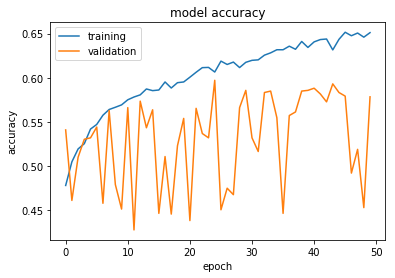

In [0]:
model = create_dense()
evaluate(model)